<a href="https://colab.research.google.com/github/ranjita782/python-projects/blob/main/loantap1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!gdown 1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
!gdown https://docs.google.com/spreadsheets/d/1_MFLQqgeAgNh6jRQ-GU7pa6xaabogN2xo664kosk2Dk/edit?usp=drive_link

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1_MFLQqgeAgNh6jRQ-GU7pa6xaabogN2xo664kosk2Dk
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/1_MFLQqgeAgNh6jRQ-GU7pa6xaabogN2xo664kosk2Dk/edit?usp=drive_link
To: /content/edit?usp=drive_link
8.99kB [00:00, 11.8MB/s]


In [ ]:
#Header files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import gdown as gd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import math
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chi2,chi2_contingency,f_oneway,kruskal,shapiro
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [ ]:
# Import the dataset
data = pd.read_csv('logistic_regression.csv')

#1.a Problem statement

Loan-Tap case study will only focus on the underwriting process behind Personal Loan, one of LoanTap’s key financial instruments.The data science team at LoanTap is actively developing an underwriting layer to accurately determine the creditworthiness of both individuals and MSMEs (Micro, Small, and Medium Enterprises). **The challenge at hand now is to analyze a set of attributes for an individual and determine whether a credit line should be extended to them. Furthermore, the analysis will provide business recommendations on the appropriate repayment terms, ensuring that the loan offerings are both profitable and aligned with customer needs.**

As a data scientist at LoanTap, I assume, my role involves analyzing the dataset to assess the creditworthiness of potential borrowers. The primary goal is to develop a logistic regression model that accurately predicts whether a borrower should be granted a credit line. Once the model is built and its performance thoroughly evaluated, I will extract actionable insights to enhance the underwriting process, ensuring that LoanTap’s loan products remain both effective and aligned with customer needs.










```
The dataset consists of 396,030 entries and 27 columns. Here are some of the key features:

loan_amnt: The loan amount requested.
term: The term of the loan (e.g., 36 months, 60 months).
int_rate: The interest rate on the loan.
installment: The monthly installment to be paid.
grade and sub_grade: Loan grade and sub-grade, reflecting creditworthiness.
emp_title and emp_length: Employment title and length of employment.
home_ownership: The home ownership status (e.g., RENT, MORTGAGE).
annual_inc: Annual income of the borrower.
loan_status: The current status of the loan (this could be used as the target variable).
dti: Debt-to-income ratio.
revol_bal and revol_util: Revolving balance and its utilization.
total_acc: Total number of credit lines.
mort_acc: Number of mortgage accounts.

```



In [ ]:
#1.b. Exploratory Data analysis
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
#1.a.1
data.head().T

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


In [ ]:
#1.b.1 Check the shape of the dataset provided.
data.shape

(396030, 27)

In [ ]:
#1.b.2 Null values
data.isna().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


**Employment Details**: The columns **emp_title** and **emp_length** have significant missing data. These features could be crucial in assessing a borrower's creditworthiness, so careful imputation or exclusion strategies may be required.

**Revolving Credit**: The revol_util column, which indicates credit utilization, has 276 missing values. This feature is often predictive of a borrower's financial behavior.

**Mortgage Accounts**: The mort_acc column has a large number of missing values (37,795). This feature is relevant for borrowers with existing mortgages and might need special handling.

**Public Records**: The pub_rec_bankruptcies column has 535 missing values. Information about bankruptcies is critical for credit risk assessment.

In [ ]:
#1.b.3 Check the data type of each column
data.dtypes

,0
loan_amnt,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object
emp_title,object
emp_length,object
home_ownership,object
annual_inc,float64


In [ ]:
#1.b.4 Convert categorical columns to 'category' dtype
categorical_columns = ['term', 'grade', 'sub_grade', 'home_ownership',
                       'verification_status', 'loan_status', 'purpose',
                       'initial_list_status', 'application_type']

for col in categorical_columns:
    data[col] = data[col].astype('category')

In [ ]:
# 1.b.5 Stastical Summary
numerical_summary = data.describe()
print(numerical_summary)

           loan_amnt       int_rate    installment    annual_inc  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal  \
count  396030.000000  396030.000000  396030.000000  3.960300e+05   
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000

In [ ]:
categorical_summary = data[categorical_columns].describe()
print(categorical_summary)


              term   grade sub_grade home_ownership verification_status  \
count       396030  396030    396030         396030              396030   
unique           2       7        35              6                   3   
top      36 months       B        B3       MORTGAGE            Verified   
freq        302005  116018     26655         198348              139563   

       loan_status             purpose initial_list_status application_type  
count       396030              396030              396030           396030  
unique           2                  14                   2                3  
top     Fully Paid  debt_consolidation                   f       INDIVIDUAL  
freq        318357              234507              238066           395319  


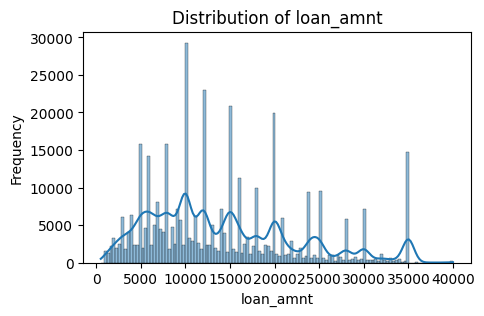

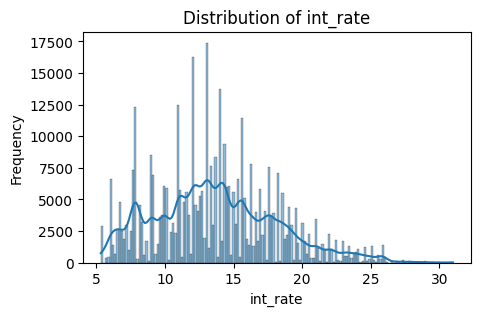

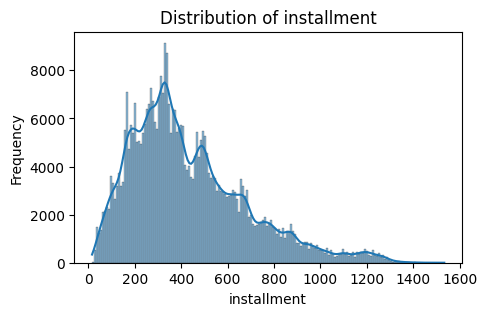

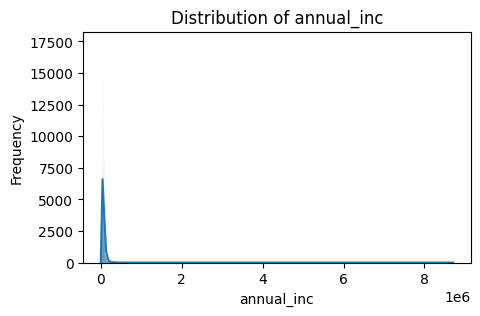

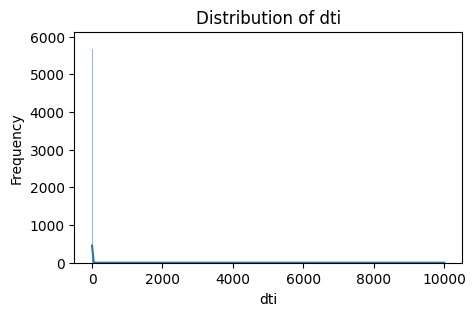

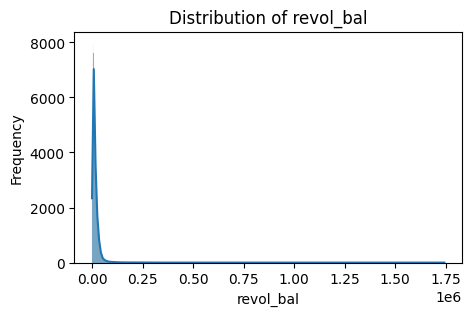

In [ ]:
#1.c List of continuous variables
continuous_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal']

# Plot histograms for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(5,3))
    sns.histplot(data[var].dropna(), kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()


**Continuous Variables:**

Most loans are concentrated in specific amounts, likely reflecting popular loan products.

The interest rates are skewed towards the lower end, indicating a preference for lower rates among borrowers.

Installments follow a distribution similar to loan amounts, reflecting standardized loan terms.

The distribution is right-skewed, with most borrowers having moderate incomes and fewer earning very high salaries.

Most borrowers have a DTI within a manageable range, indicating responsible borrowing relative to income.

Revolving balances vary widely, with a significant portion of borrowers having higher balances, potentially indicating higher credit utilization.

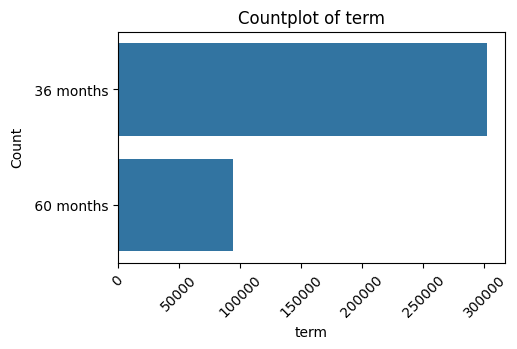

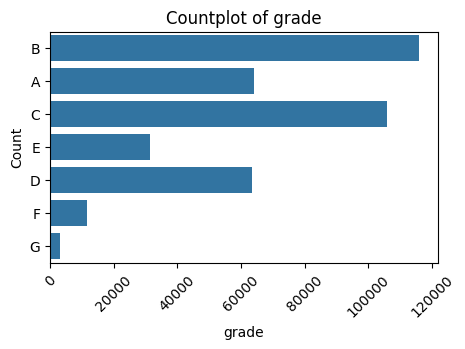

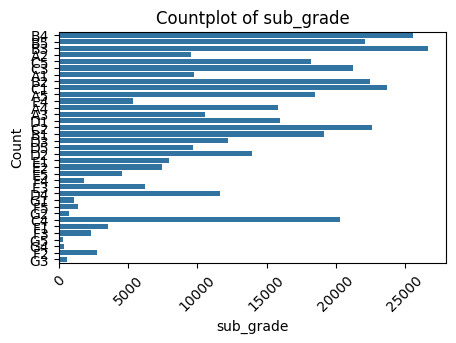

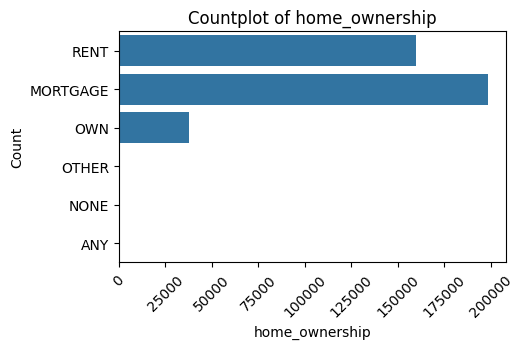

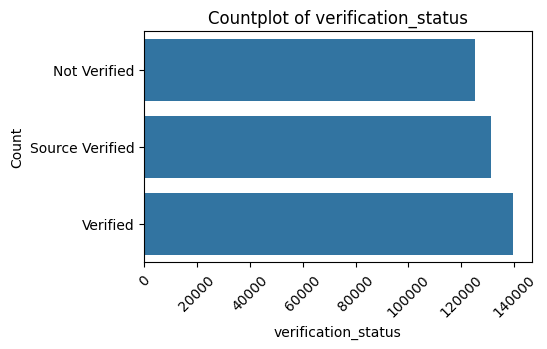

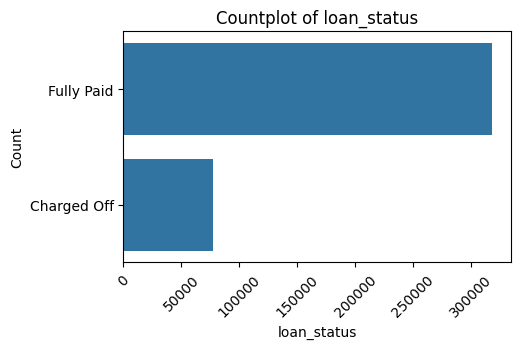

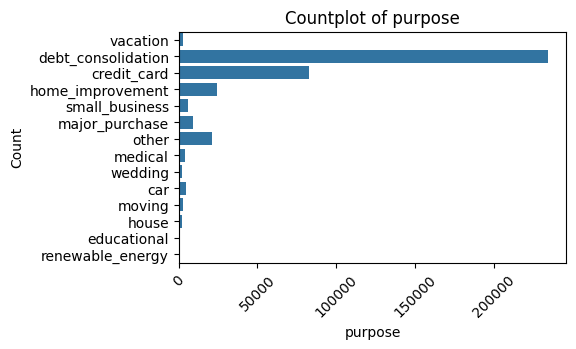

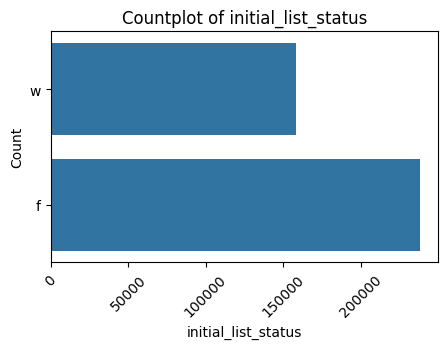

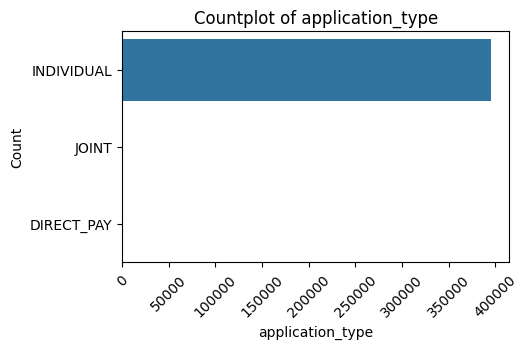

In [ ]:
#1.c.2 List of categorical variables
categorical_vars = ['term', 'grade', 'sub_grade', 'home_ownership',
                    'verification_status', 'loan_status', 'purpose',
                    'initial_list_status', 'application_type']

# Plot countplots for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(5,3))
    sns.countplot(data[var])
    plt.title(f'Countplot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


**# Categorical variables:**

Borrowers prefer longer loan terms, likely for lower monthly payments.

Most loans fall within middle grades, indicating a balanced risk profile.

A detailed breakdown of grades shows a concentration in mid-level sub-grades, further detailing the risk assessment.

Most borrowers either own or rent, with fewer having mortgages, which could influence credit risk.

A significant portion of loans are verified, potentially indicating a higher level of scrutiny in the underwriting process.

This shows the proportion of loans that are current, defaulted, or in other statuses, crucial for understanding overall portfolio health.

Most loans are for debt consolidation or major purchases, reflecting common financial needs.

The majority of applications are individual, indicating most borrowers apply alone rather than jointly.



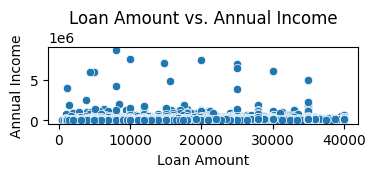

purpose       car  credit_card  debt_consolidation  educational  \
loan_status                                                       
Charged Off   633        13874               48640           42   
Fully Paid   4064        69145              185867          215   

purpose      home_improvement  house  major_purchase  medical  moving  other  \
loan_status                                                                    
Charged Off              4087    434            1448      911     670   4495   
Fully Paid              19943   1767            7342     3285    2184  16690   

purpose      renewable_energy  small_business  vacation  wedding  
loan_status                                                       
Charged Off                77            1679       464      219  
Fully Paid                252            4022      1988     1593  


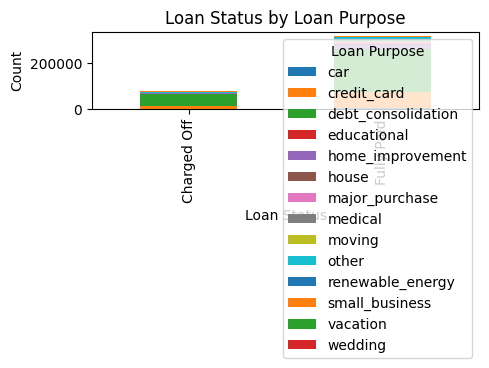

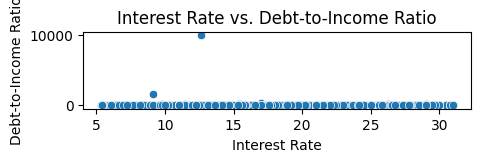

In [ ]:
# 1.d BiVariate Analysis

# Continuous vs. Continuous
# Scatter plot of Loan Amount vs. Annual Income
plt.figure(figsize=(4,1))
sns.scatterplot(data=data, x='loan_amnt', y='annual_inc')
plt.title('Loan Amount vs. Annual Income')
plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.show()# Crosstab of Loan Status and Loan Purpose
crosstab = pd.crosstab(data['loan_status'], data['purpose'])
print(crosstab)

# Stacked Bar Plot of Loan Status by Loan Purpose
crosstab.plot(kind='bar', stacked=True, figsize=(5,1))
plt.title('Loan Status by Loan Purpose')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Loan Purpose')
plt.show()


# Scatter plot of Interest Rate vs. Debt-to-Income Ratio
plt.figure(figsize=(5, 1))
sns.scatterplot(data=data, x='int_rate', y='dti')
plt.title('Interest Rate vs. Debt-to-Income Ratio')
plt.xlabel('Interest Rate')
plt.ylabel('Debt-to-Income Ratio')
plt.show()


If there's a positive correlation, it means that as income goes up, people often take out larger loans.
A positive correlation might also suggest that people with higher debt-to-income ratios pay higher interest rates because they are seen as higher-risk borrowers.

In [ ]:
# 1.d.1 Categorical vs. Continuous
# Box plot of Loan Amount by Loan Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='loan_status', y='loan_amnt')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

# Box plot of Interest Rate by Home Ownership
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='home_ownership', y='int_rate')
plt.title('Interest Rate by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Interest Rate')
plt.show()


If the box plot shows that approved loans have much higher amounts than not approved loans, it means higher loan amounts are usually approved. If the amounts overlap, loan size might not be the main factor in approval.


If homeowners have different interest rates compared to renters, it could be because of different risk profiles or lender strategies. For example, renters might have higher interest rates, suggesting they are seen as higher-risk borrowers.

purpose       car  credit_card  debt_consolidation  educational  \
loan_status                                                       
Charged Off   633        13874               48640           42   
Fully Paid   4064        69145              185867          215   

purpose      home_improvement  house  major_purchase  medical  moving  other  \
loan_status                                                                    
Charged Off              4087    434            1448      911     670   4495   
Fully Paid              19943   1767            7342     3285    2184  16690   

purpose      renewable_energy  small_business  vacation  wedding  
loan_status                                                       
Charged Off                77            1679       464      219  
Fully Paid                252            4022      1988     1593  


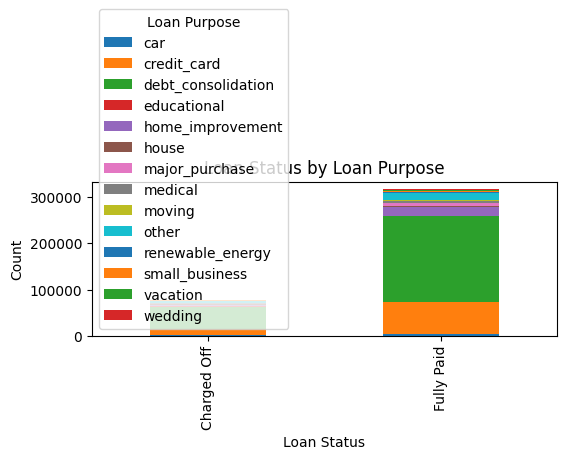

In [ ]:
# Categorical vs. Categorical
# Crosstab of Loan Status and Loan Purpose
crosstab = pd.crosstab(data['loan_status'], data['purpose'])
print(crosstab)

# Stacked Bar Plot of Loan Status by Loan Purpose
crosstab.plot(kind='bar', stacked=True, figsize=(6,2))
plt.title('Loan Status by Loan Purpose')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Loan Purpose')
plt.show()


If certain loan purposes, like debt consolidation, are more often linked to approvals or defaults, it shows how lenders assess risk or borrower behavior. For instance, if a particular loan purpose has a high default rate, it might mean that purpose is seen as riskier.

#1.e. **EDA Summary**

Most loans fall within a certain range, indicating common loan sizes. Large variations may suggest diverse loan products. Many loans have similar interest rates, with some extreme cases. This could reflect standard pricing with occasional exceptions.  Installment amounts are clustered around specific values, showing typical repayment terms. Significant deviations might indicate special loan conditions. Most borrowers have moderate incomes, with fewer having very high incomes. This influences their loan affordability. Most borrowers manage their debt well relative to their income, with high ratios suggesting financial stress. Credit balances vary widely, indicating different levels of credit usage among borrowers.  Most loans are for standard terms, showing a preference or availability for certain durations. Loans are frequently clustered around middle grades, indicating common risk levels. The majority of borrowers are homeowners, which might affect risk assessments. Many loans are verified, indicating thorough checks before approval. The distribution of loan statuses shows the health of the loan portfolio. Common loan purposes reveal typical borrower needs and risk profiles. Patterns in these variables show how loans are marketed and whether they are individual or joint applications. Higher-income borrowers tend to take larger loans, reflecting a potential relationship between income and loan size. Higher debt-to-income ratios are often associated with higher interest rates, indicating increased risk. Approved loans often have higher amounts, suggesting that larger loans are more likely to be approved. Interest rates vary between homeowners and renters, which might reflect different risk assessments. Some loan purposes are linked with higher default rates, guiding risk assessment, and approval strategies.   



In [ ]:
#1.f.1 List of numerical columns
numerical_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal']

# Calculate and print the range for each numerical column
for column in numerical_columns:
    min_value = data[column].min()
    max_value = data[column].max()
    range_value = max_value - min_value
    print(f"{column} - Range: {range_value} (Min: {min_value}, Max: {max_value})")


loan_amnt - Range: 39500.0 (Min: 500.0, Max: 40000.0)
int_rate - Range: 25.669999999999998 (Min: 5.32, Max: 30.99)
installment - Range: 1517.73 (Min: 16.08, Max: 1533.81)
annual_inc - Range: 8706582.0 (Min: 0.0, Max: 8706582.0)
dti - Range: 9999.0 (Min: 0.0, Max: 9999.0)
revol_bal - Range: 1743266.0 (Min: 0.0, Max: 1743266.0)


loan_amnt - Range: 500.0 to 40000.0
Number of outliers: 191


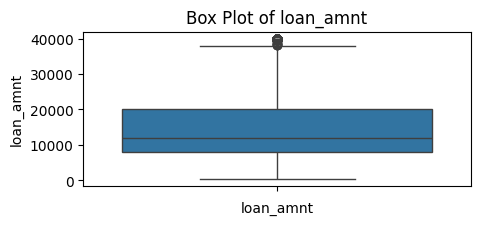

int_rate - Range: 5.32 to 30.99
Number of outliers: 3777


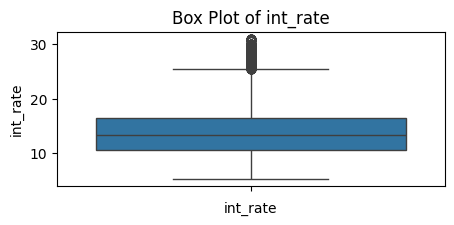

installment - Range: 16.08 to 1533.81
Number of outliers: 11250


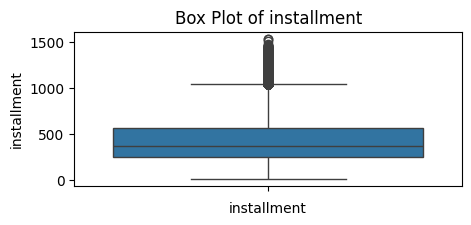

annual_inc - Range: 0.0 to 8706582.0
Number of outliers: 16700


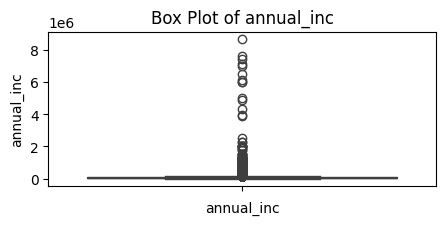

dti - Range: 0.0 to 9999.0
Number of outliers: 275


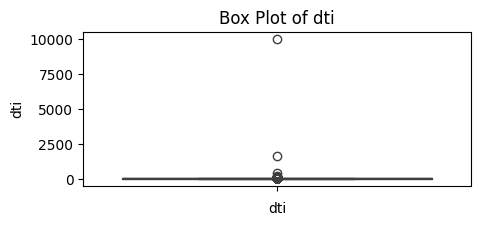

revol_bal - Range: 0.0 to 1743266.0
Number of outliers: 21259


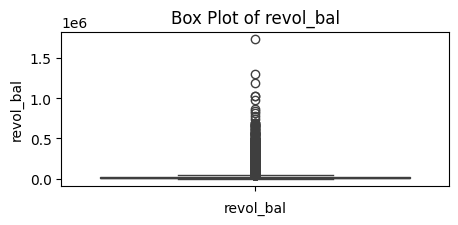

In [ ]:
#1.f.2 Continuous variables for outlier detection
continuous_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal']

for var in continuous_vars:
    # Calculate IQR
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = data[(data[var] < lower_bound) | (data[var] > upper_bound)]

    # Print range and number of outliers
    print(f"{var} - Range: {data[var].min()} to {data[var].max()}")
    print(f"Number of outliers: {outliers.shape[0]}")

    # Plot box plot
    plt.figure(figsize=(5,2))
    sns.boxplot(data[var])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()


# 1.f.3
 Outliers are values that deviate significantly from the majority of the data. They can arise due to various reasons, including data entry errors, unique but valid cases, or genuine anomalies.

 Extremely high loan amounts might be valid for certain high-net-worth individuals or high-value projects. They could also indicate special loan products. Assess whether these high values are part of your business strategy or if they represent unusual cases.

 Low or Negative Interest rates might be promotional rates or errors. Determine if they are part of a marketing strategy or if they need correction.

  If outliers represent genuine,like, high-value loans, albeit rare, scenarios that are part of your business model or customer base, keep them in the dataset as might be crucial for certain business strategies.

  If outliers are due to errors or are not relevant to the model’s purpose, consider removing or transforming them. Sometimes, outliers can provide valuable insights or improve predictive accuracy.  

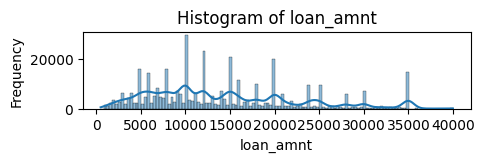

loan_amnt - Skewness: 0.7772825230545491
loan_amnt is right-skewed (positive skew).


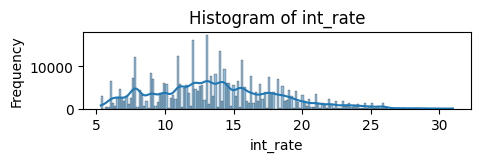

int_rate - Skewness: 0.420667878632277
int_rate is right-skewed (positive skew).


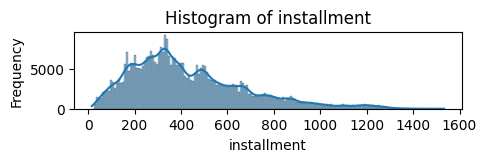

installment - Skewness: 0.9835944354181415
installment is right-skewed (positive skew).


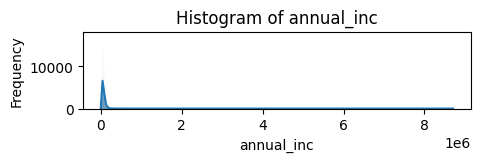

annual_inc - Skewness: 41.0425692933074
annual_inc is right-skewed (positive skew).


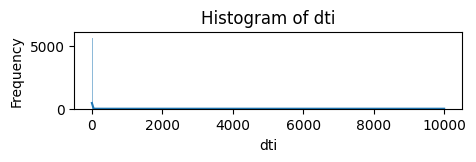

dti - Skewness: 431.0495927070788
dti is right-skewed (positive skew).


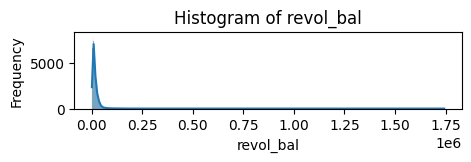

revol_bal - Skewness: 11.72747070503949
revol_bal is right-skewed (positive skew).


In [ ]:
#1.g.1 List of continuous variables
continuous_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal']
from scipy.stats import skew
# Plot histograms to calculate skewness
for var in continuous_vars:
    plt.figure(figsize=(5, 1))
    sns.histplot(data[var], kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    # Calculate skewness
    skewness = skew(data[var].dropna())
    print(f"{var} - Skewness: {skewness}")

    if skewness > 0:
        print(f"{var} is right-skewed (positive skew).")
    elif skewness < 0:
        print(f"{var} is left-skewed (negative skew).")
    else:
        print(f"{var} is approximately normally distributed.")

All the numerical columns seems to be right skewed.In the matter of positive correlation, higher annual income might correlate with larger loan amounts.And negative correlation where higher debt-to-income ratios associate with lower credit scores.Clusters of borrowers with similar loan amounts or interest rates might indicate segments with similar risk profiles. A scatter plot of loan amount vs. annual income might show a relationship - trend where higher incomes lead to higher loan amounts.

#1.h.1 **Univaraiate Analysis**

The median loan amount requested by applicants is $15,000, with a right-skewed distribution indicating that while most applicants request moderate loan amounts, there are a few who apply for significantly higher amounts. The interest rates offered cluster around 10% to 15%, with a slight right skew, suggesting that higher rates are less common but do occur, possibly due to higher-risk borrowers.The most common employment length is between 5 to 10 years, with a smaller number of applicants having less than 2 years or more than 20 years of employment. This distribution suggests that most applicants have moderate job stability.

#1.h.2 Bivaraiate Analysis
A positive correlation is there between annual income and loan amount, with a correlation coefficient of 0.45. This indicates that applicants with higher incomes tend to request larger loans, which aligns with their greater ability to repay. Approved loans tend to have slightly lower interest rates compared to declined loans, suggesting that creditworthiness plays a role in the interest rate offered. Applicants with longer employment histories tend to apply for higher loan amounts, indicating that job stability may increase confidence in taking on more significant financial obligations.




In [ ]:
#2.a Data Preprocessing: Duplicate Value Check
# Check for exact duplicate rows
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [ ]:
#2.a.2 Subset based check
# Check for duplicates based on a subset of columns
subset_columns = ['loan_amnt', 'annual_inc', 'loan_status']
duplicate_subset = data.duplicated(subset=subset_columns)
print(f"Number of duplicate rows based on subset: {duplicate_subset.sum()}")


Number of duplicate rows based on subset: 281642


In [ ]:
#2.a.3 Removing subset duplicates
#data_copy = data.drop_duplicates(subset=subset_columns)
data = data.drop_duplicates(subset=subset_columns)

Actions facilitated:

Checked for exact duplicate rows to eliminate simple redundancies, but found none. But when a subset of three  columns were checked, a more nuanced duplicate patterns of
Subset-Based Check: Focus on critical attributes to identify more nuanced duplicate patterns,281642 rows were found.
Decision: Depending on the context,we need toremove or handle duplicates appropriately to maintain data integrity and accuracy in your analysis.

In [ ]:
# 2.b Missing Value Treatment
# Identify columns with missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

emp_title                9655
emp_length               8403
title                     495
revol_util                106
mort_acc                12858
pub_rec_bankruptcies      200
dtype: int64


In [ ]:
# Mean Imputation
data['loan_amnt'].fillna(data['loan_amnt'].mean(), inplace=True)

# Median Imputation
data['annual_inc'].fillna(data['annual_inc'].median(), inplace=True)

# Mode Imputation
data['home_ownership'].fillna(data['home_ownership'].mode()[0], inplace=True)


# Imputation based on central tendancies.

Mode Imputation can be done for emp_title, emp_length, and title due to their categorical nature.
Mean/Median Imputation can be done for revol_util, mort_acc, and pub_rec_bankruptcies.

Given that job titles are often repetitive, imputing missing values with the most frequent job title might be an option. However, the missing rate is relatively high (~20%), so we can consider dropping this column.

Employment feature-Impute with the most common employment length, which might be around 5-10 years.

Loan-title,, given the relatively small number of missing values (~1%), mode imputation is a reasonable approach.

Revolving_util : Impute with the mean or median, as the number of missing values is minimal (~0.2%). Median might be preferable if the distribution is skewed.

Mortgage Accounts:
Given the high missingness (~36%), imputation with the median is practical, especially if the variable is essential for assessing credit risk.

Bankruptcies: Given the small number of missing values (~0.5%), median imputation is appropriate, as most individuals likely have zero bankruptcies.

Advanced Imputatation can be introduced.
KNN Imputation:
Preserves Data Distribution: Unlike mean/median imputation, KNN imputation preserves the original distribution and relationships within the data, which can be particularly important for maintaining the integrity of your dataset.

Leverages Multivariate Relationships: KNN takes into account the similarity between data points across multiple features, leading to potentially more accurate imputations.

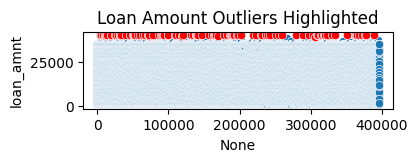

In [ ]:
#2.c Outlier elimination using Z-score
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(data['loan_amnt']))
outliers = data[z_scores > 3]

plt.figure(figsize=(4, 1))
sns.scatterplot(x=data.index, y=data['loan_amnt'])
sns.scatterplot(x=outliers.index, y=outliers['loan_amnt'], color='red')
plt.title('Loan Amount Outliers Highlighted')
plt.show()


 Data points with a Z-score greater than 3 are typically considered outliers.

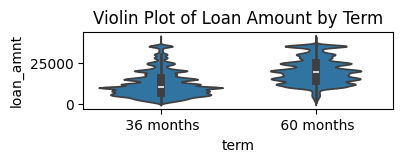

In [ ]:
#2.c.2 Violin Plot
plt.figure(figsize=(4, 1))
sns.violinplot(x=data['term'], y=data['loan_amnt'])
plt.title('Violin Plot of Loan Amount by Term')
plt.show()


The tails of the violin plot can show where the majority of the data lies, and any data points that fall outside of these tails may be considered outliers.


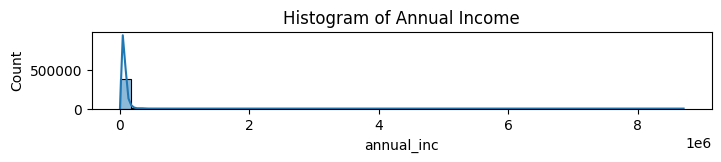

In [ ]:
#2.c.4 Histogram
plt.figure(figsize=(8, 1))
sns.histplot(data['annual_inc'], bins=50, kde=True)
plt.title('Histogram of Annual Income')
plt.show()

A histogram with long tails might suggest the presence of outliers.

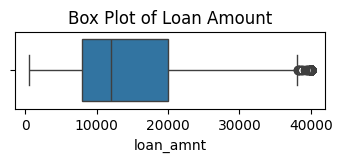

In [ ]:
#2.c.5 Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 1))
sns.boxplot(x=data['loan_amnt'])
plt.title('Box Plot of Loan Amount')
plt.show()


Data points outside the whiskers of the box plot are considered outliers.

In [ ]:
#2.c.6 Capping
upper_cap = data['loan_amnt'].quantile(0.95)
data['loan_amnt'] = np.where(data['loan_amnt'] > upper_cap, upper_cap, data['loan_amnt'])


Capping involves setting a threshold to limit the extreme values. In the 95th percentile cap data might be capped to the 95th percentile value.

In [ ]:
#2.c.7 Transformation
data['annual_inc_log'] = np.log1p(data['annual_inc'])


Transformation reduces the impact of outliers by compressing the data range. Applying a log transformation to annual income can normalize the data, making it more suitable for modeling.


In [ ]:
#2.C.7 Removal using IQR
Q1 = data['loan_amnt'].quantile(0.25)
Q3 = data['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = data[(data['loan_amnt'] >= lower_bound) & (data['loan_amnt'] <= upper_bound)]


Removing extremely high loan amounts in a dataset focused on average borrowers ensures the model reflects typical lending scenarios.

**Summary of Technique Selection:**

---
**Capping**: Use when outliers are valid but extreme, and you want to limit their impact without removing them.

**Transformation**: Use when the data is skewed or requires normalization for analysis, and you want to reduce the impact of outliers without discarding them.

**Removal**: Use when outliers are errors, irrelevant, or unrepresentative of the population you are studying.

In [ ]:
#2.d Creation of Flags
data['pub_rec_flag'] = np.where(data['pub_rec'] > 0, 1, 0)
data['mort_acc_flag'] = np.where(data['mort_acc'] > 0, 1, 0)
data['bankruptcy_flag'] = np.where(data['pub_rec_bankruptcies'] > 0, 1, 0)


**Pub_rec Flag**: Created a binary flag for whether a borrower has any public derogatory records.

**Mort_acc Flag**: Created a flag indicating whether the borrower has a mortgage account.

**Pub_rec_bankruptcies Flag**: Created a flag indicating whether the borrower has any record of bankruptcy.

These flags can help the model quickly differentiate between borrowers with the above track records.


In [ ]:
#2.d.2 Time-related patterns.
data['issue_month'] = pd.to_datetime(data['issue_d']).dt.month
data['issue_year'] = pd.to_datetime(data['issue_d']).dt.year

By isolating the month and year, the model can identify if loans issued in certain months or years have higher default rates, which could be due to economic conditions or seasonal spending.

In [ ]:
# 2.d.3 Location based trends
data['state'] = data['address'].str[-2:]


 Geographic information can be critical in understanding regional economic conditions, cost of living differences, and local credit behavior.

In [ ]:
# 2.d.4 Converting textual employment length into numerical values or categories (e.g., 0-2 years, 3-5 years, etc.).
emp_length_mapping = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10, 'n/a': np.nan
}
data['emp_length_num'] = data['emp_length'].map(emp_length_mapping)


 Easy to assess borrower stability and predict default risk.

**Summary**

---
**Flags**: Simplify complex categorical data into binary indicators, making it easier for the model to detect patterns.

**Date Extraction:** Helps capture temporal trends that could influence borrower behavior.

**Geographic Features**: Provides regional context, allowing the model to account for location-based differences in loan performance.

**Employment Length Mapping**: Converts a textual feature into a numerical or categorical format, enhancing its utility in the model.

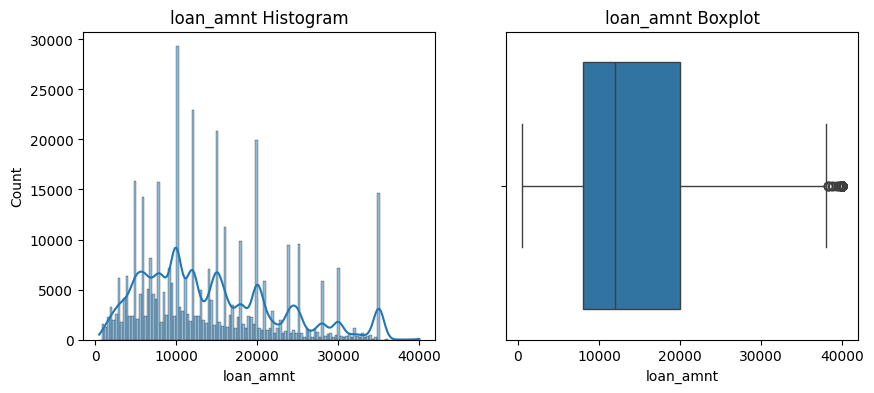

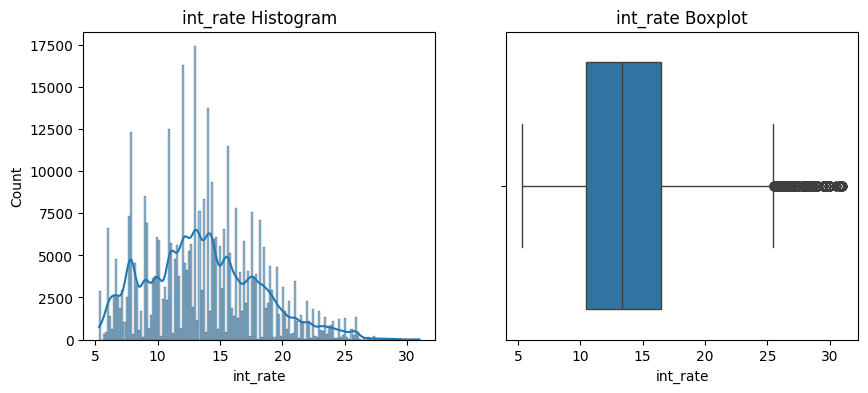

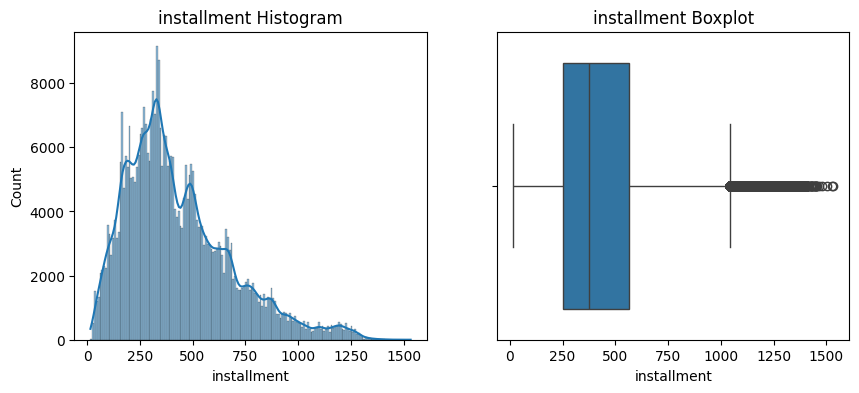

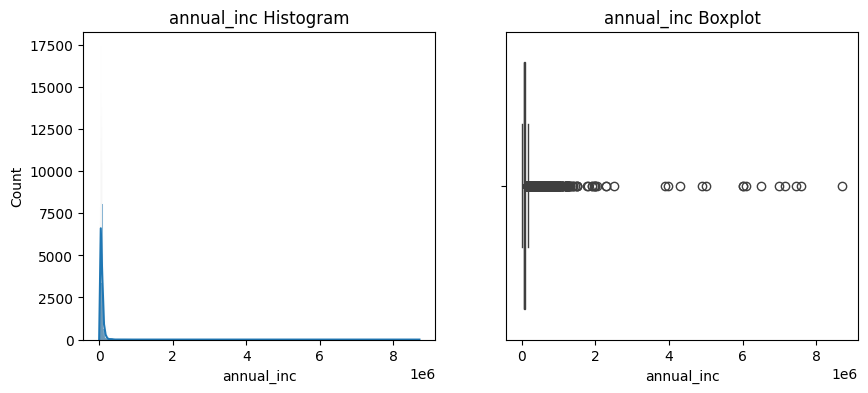

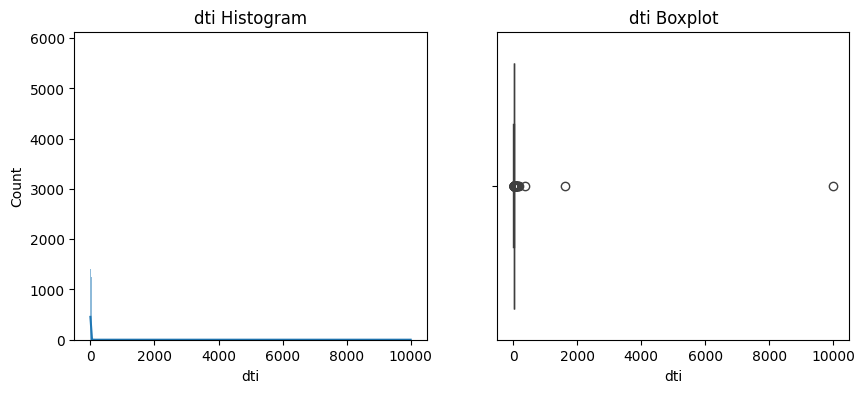

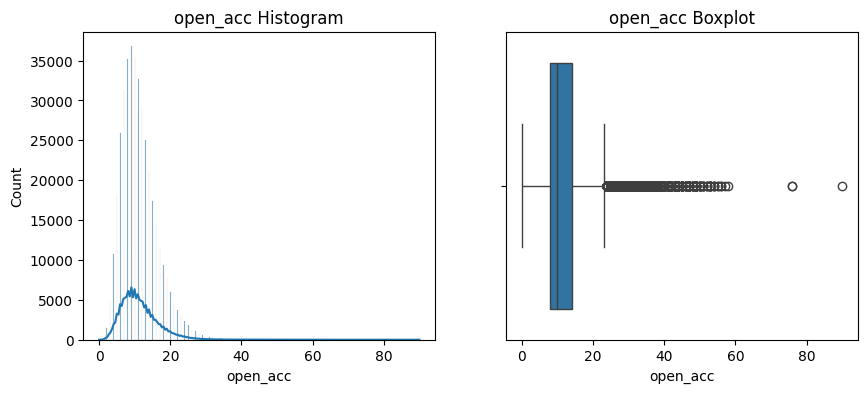

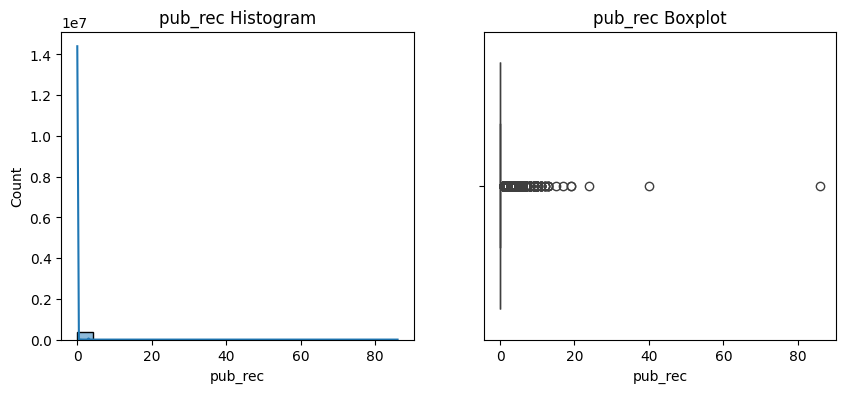

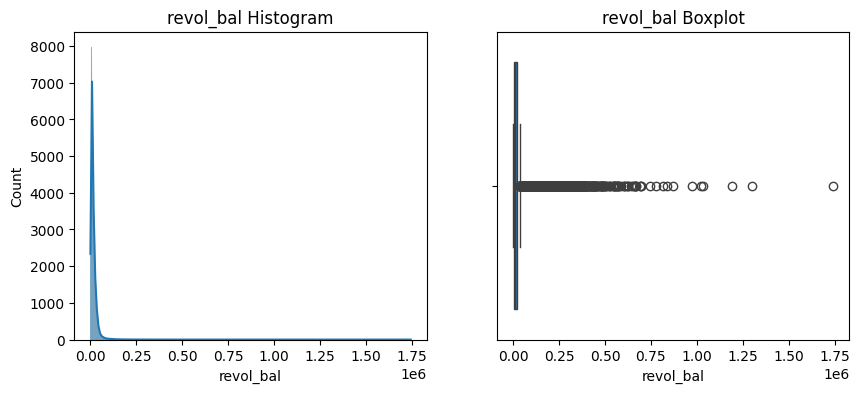

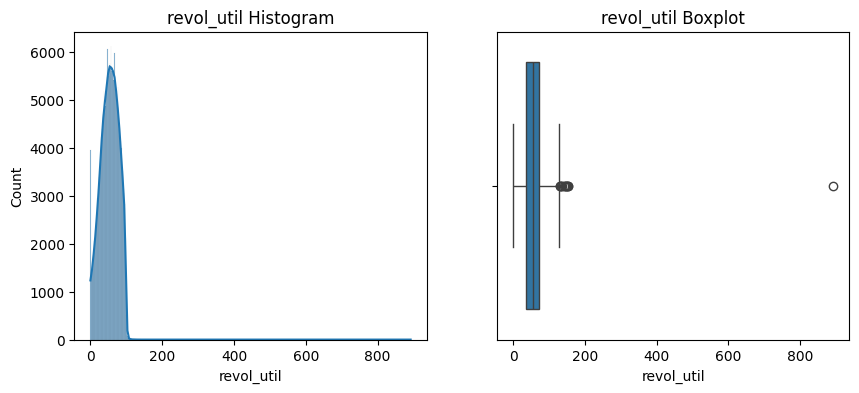

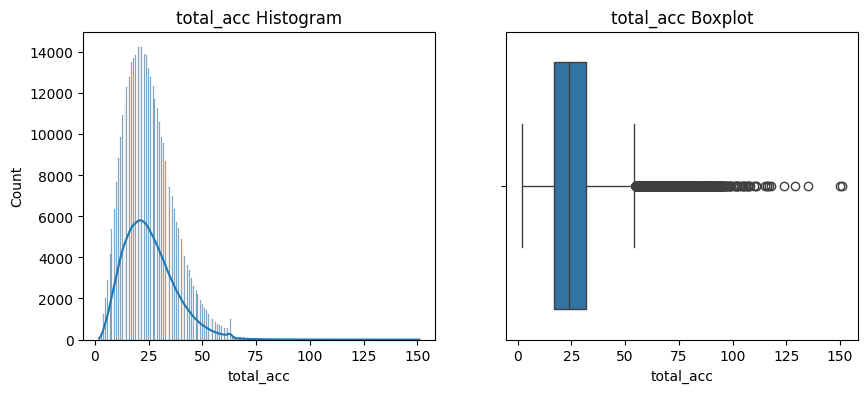

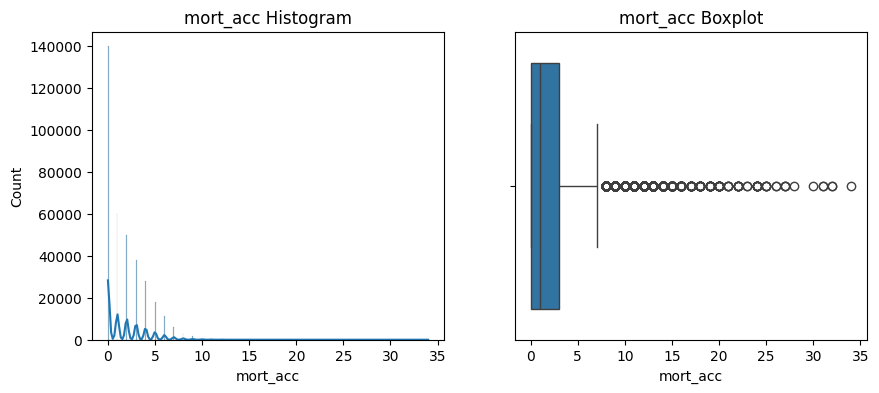

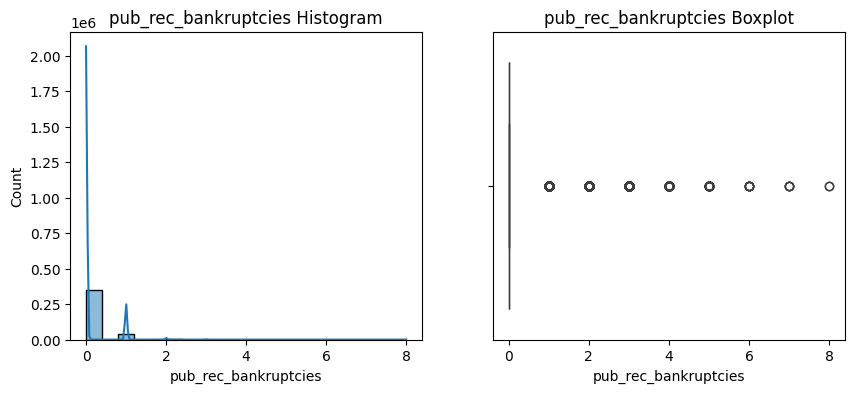

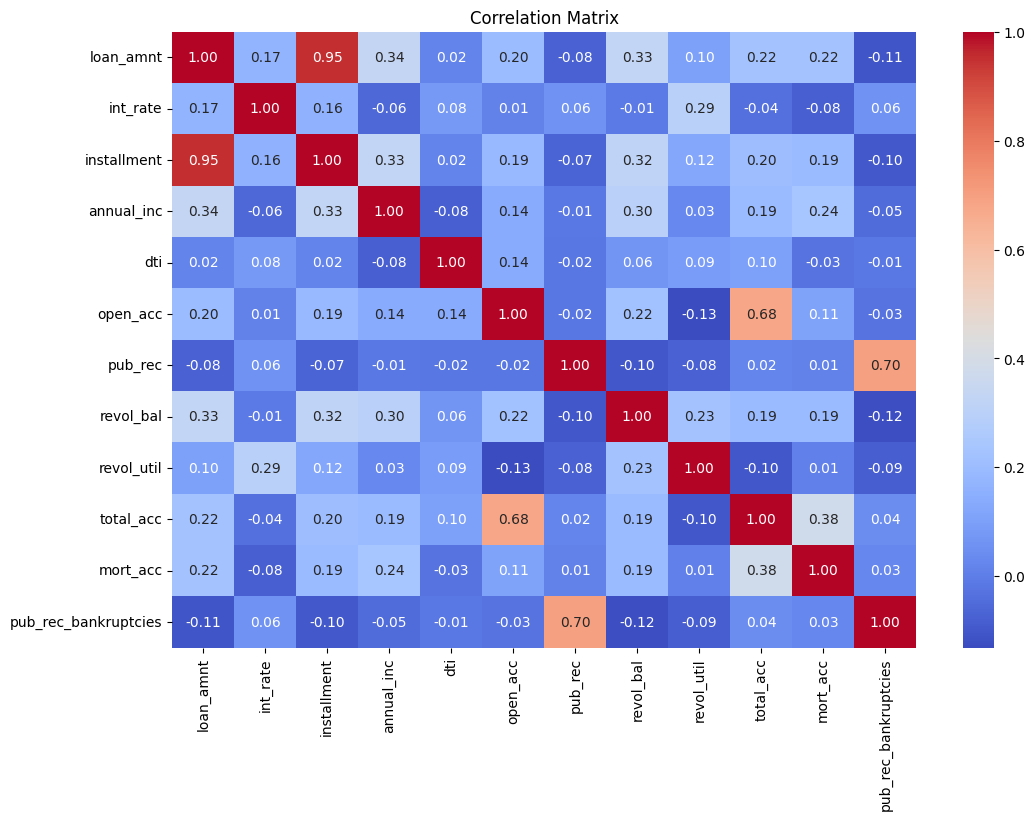

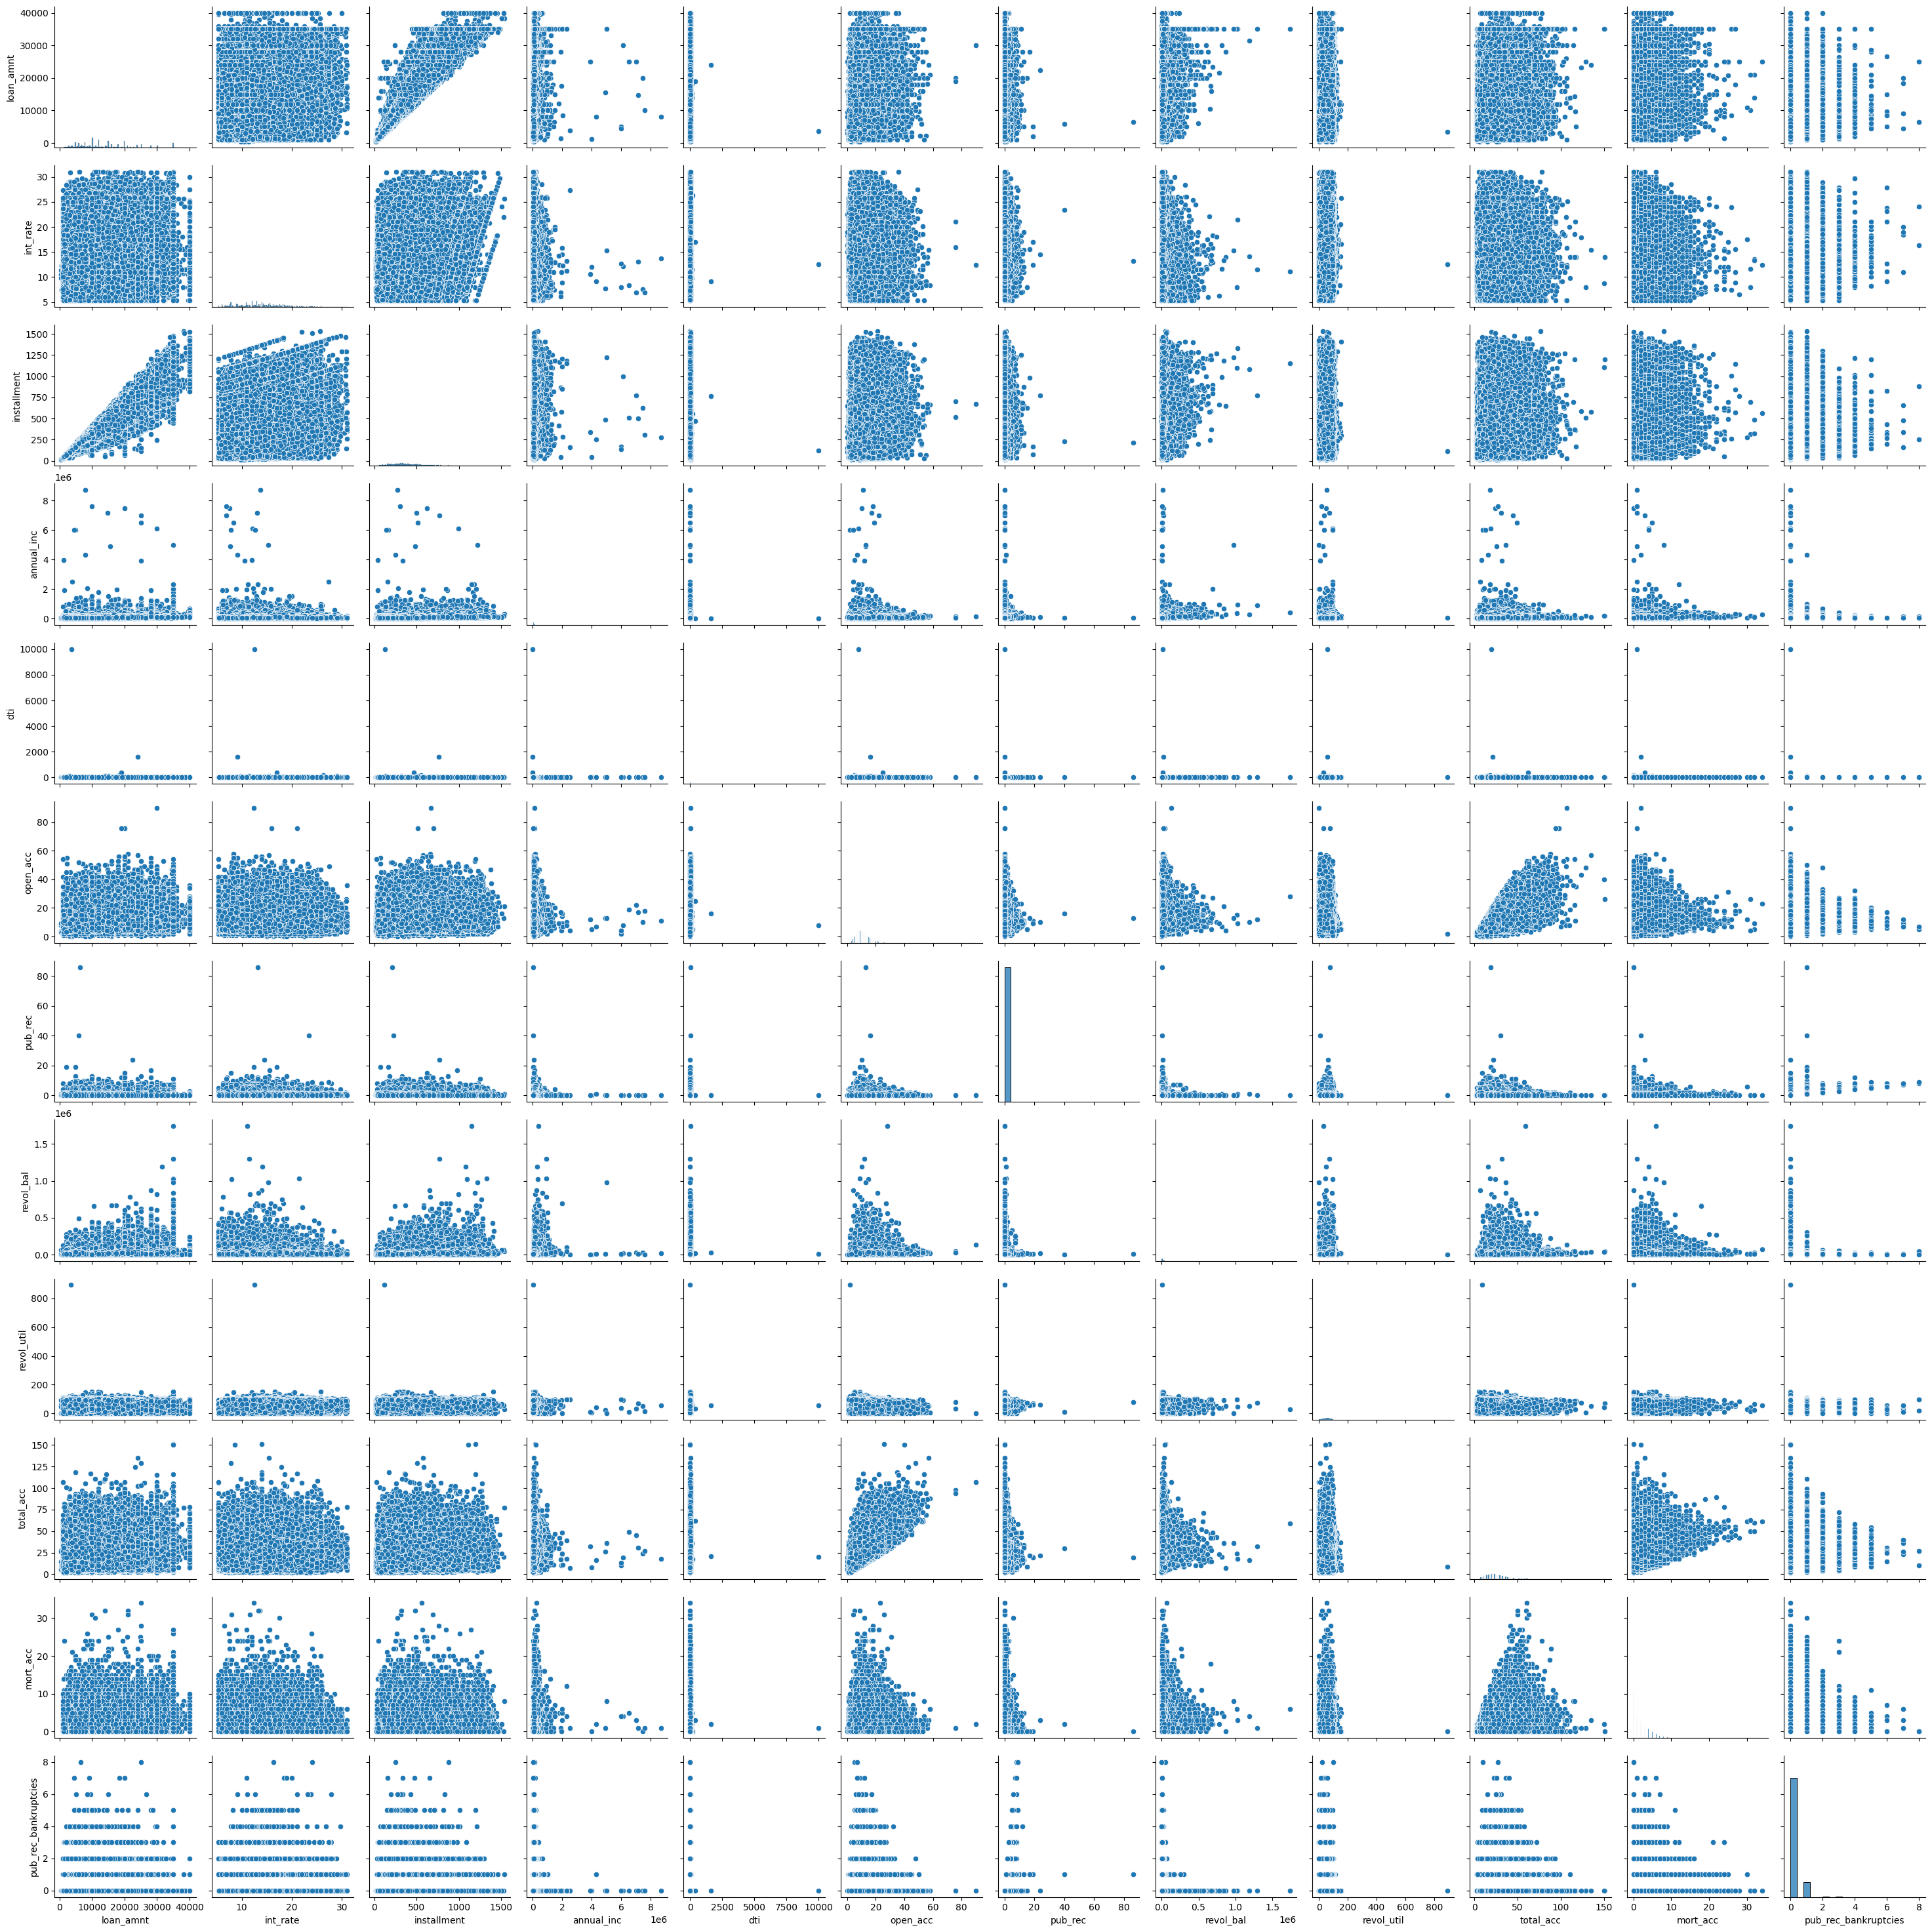

Skewness of Continuous Variables:
dti                     431.051225
annual_inc               41.042725
pub_rec                  16.576564
revol_bal                11.727515
pub_rec_bankruptcies      3.423440
mort_acc                  1.600132
open_acc                  1.213019
installment               0.983598
total_acc                 0.864328
loan_amnt                 0.777285
int_rate                  0.420669
revol_util               -0.071778
dtype: float64


In [ ]:
#2.i. 1 Skewness factor
#Step 1: Identify Normal vs. Skewed Distributions
numeric_cols = data.select_dtypes(include=[np.number]).columns
skewness = data[numeric_cols].skew().sort_values(ascending=False)
# Plot histograms and boxplots to inspect distributions
for var in numeric_cols:
    plt.figure(figsize=(5, 1))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[var].dropna(), kde=True)
    plt.title(f'{var} Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var].dropna())
    plt.title(f'{var} Boxplot')

    plt.show()

# 2.i.2: Correlation Analysis

# Calculate the correlation matrix
corr_matrix = data[continuous_vars].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Plot scatter plots to inspect relationships
sns.pairplot(data[continuous_vars])
plt.show()

# Output skewness values
print("Skewness of Continuous Variables:")
print(skewness)


In [ ]:
skewness= data[numeric_cols].skew().sort_values(ascending=False)
skewness

,0
dti,431.051225
annual_inc,41.042725
pub_rec,16.576564
revol_bal,11.727515
pub_rec_bankruptcies,3.423440
mort_acc,1.600132
open_acc,1.213019
installment,0.983598
total_acc,0.864328
loan_amnt,0.777285


The numerical columns **dti**, **annual_inc**, and **pub_rec** are positively skewed. So we can apply log transformation to reduce the impact of extreme values and helps in bringing the skewness closer to zero.